In [ ]:
from sklearn.datasets import make_regression
N=1000
P=20
X, y = make_regression(n_samples=N, n_features=P, noise=1, random_state=42)
print(X.shape,y.shape)

(1000, 20) (1000,)


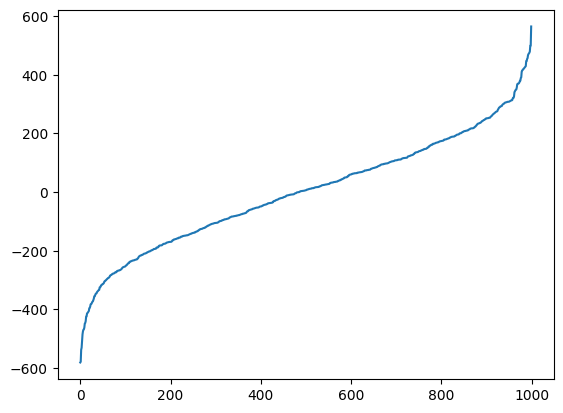

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.sort(y))
plt.show()

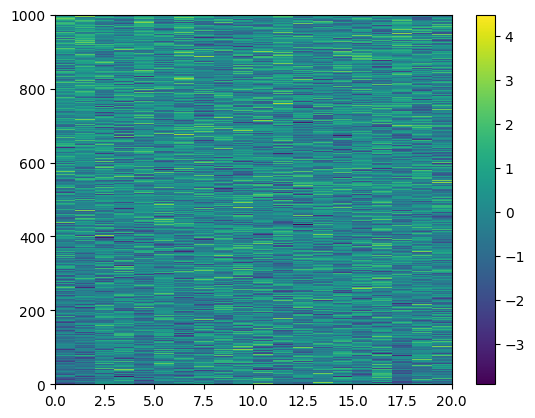

In [ ]:
ind_ =np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()

In [ ]:
def mincua_reg(X,y, lamb_=1e-3): #Ajustar, optimizar
  alpha=np.linalg.inv(X.T.dot(X)+lamb_*np.eye(X.shape[1])).dot(X.T).dot(y)
  return alpha

[ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]


<StemContainer object of 3 artists>

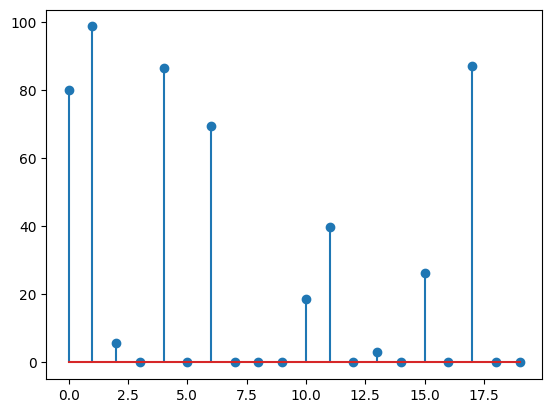

In [ ]:
alpha =mincua_reg(X,y)
print(alpha)
plt.stem(np.arange(len(alpha)),np.abs(alpha))

In [ ]:
ypred = X.dot(alpha)

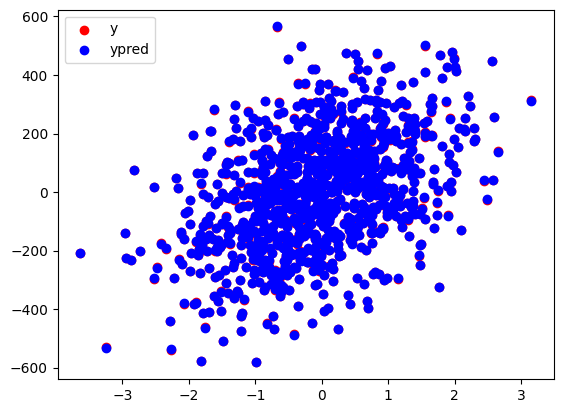

In [ ]:
plt.scatter(X[ind_,0],y[ind_], color='red', label='y')
plt.scatter(X[ind_,0],ypred[ind_], color='blue', label='ypred')
plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import make_regression

N = 1000   # número de muestras
P = 20     # número de características
X, y = make_regression(n_samples=N, n_features=P, noise=1, random_state=42)

print(X.shape, y.shape)


(1000, 20) (1000,)


In [ ]:
import numpy as np

# Añadir columna de 1s para el bias (intercepto)
X_b = np.c_[np.ones((N, 1)), X]   # -> (1000, 21)
y = y.reshape(-1, 1)              # -> (1000, 1)


In [ ]:
def compute_cost(X, y, theta):
    N = len(y)
    errors = X.dot(theta) - y
    return (1/(2*N)) * np.sum(errors**2)

def compute_gradient(X, y, theta):
    N = len(y)
    errors = X.dot(theta) - y
    return (1/N) * X.T.dot(errors)


In [ ]:
# Inicialización
theta = np.zeros((P+1, 1))   # parámetros iniciales en 0
learning_rate = 0.01
epochs = 1000

cost_history = []

for i in range(epochs):
    grad = compute_gradient(X_b, y, theta)
    theta = theta - learning_rate * grad   # actualización

    cost = compute_cost(X_b, y, theta)
    cost_history.append(cost)

    if i % 100 == 0:
        print(f"Iteración {i}: Costo = {cost:.4f}")


Iteración 0: Costo = 18588.8263
Iteración 100: Costo = 2585.1482
Iteración 200: Costo = 372.4390
Iteración 300: Costo = 55.7616
Iteración 400: Costo = 8.9756
Iteración 500: Costo = 1.8474
Iteración 600: Costo = 0.7275
Iteración 700: Costo = 0.5459
Iteración 800: Costo = 0.5155
Iteración 900: Costo = 0.5103



Parámetros finales aprendidos (theta):
[-2.93138331e-02  7.99991201e+01  9.85910493e+01  5.57104536e+00
  2.65720312e-02] ...


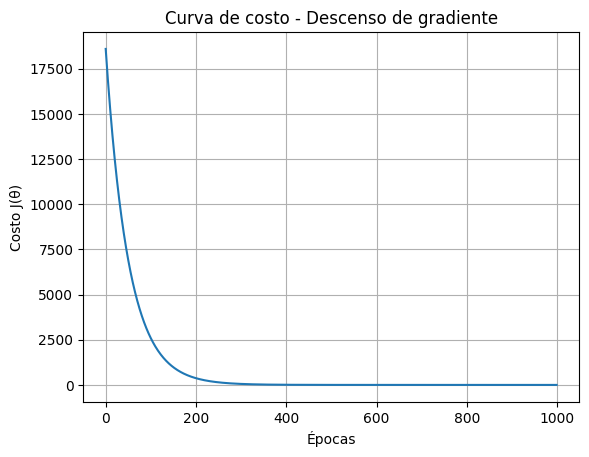

In [ ]:
print("\nParámetros finales aprendidos (theta):")
print(theta.flatten()[:5], "...")  # mostramos los primeros 5

import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.title("Curva de costo - Descenso de gradiente")
plt.xlabel("Épocas")
plt.ylabel("Costo J(θ)")
plt.grid(True)
plt.show()


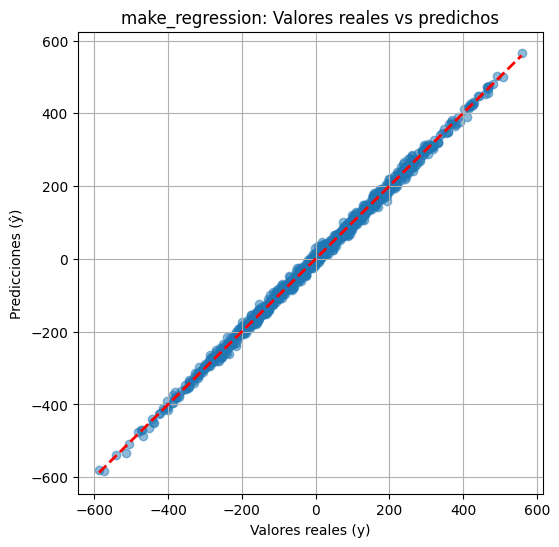

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Dataset sintético
N, P = 1000, 20
X, y = make_regression(n_samples=N, n_features=P, noise=10, random_state=42)
y = y.reshape(-1, 1)

# Normalizar X y añadir bias
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Gradiente descendente
def compute_cost(X, y, theta):
    N = len(y)
    errors = X.dot(theta) - y
    return (1/(2*N)) * np.sum(errors**2)

def compute_gradient(X, y, theta):
    N = len(y)
    errors = X.dot(theta) - y
    return (1/N) * X.T.dot(errors)

theta = np.zeros((X_b.shape[1], 1))
lr, epochs = 0.1, 500
for i in range(epochs):
    grad = compute_gradient(X_b, y, theta)
    theta -= lr * grad

# Predicciones
y_pred = X_b.dot(theta)

# Scatter: y real vs predicción
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)  # línea ideal
plt.title("make_regression: Valores reales vs predichos")
plt.xlabel("Valores reales (y)")
plt.ylabel("Predicciones (ŷ)")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


(20640, 8) (20640,)


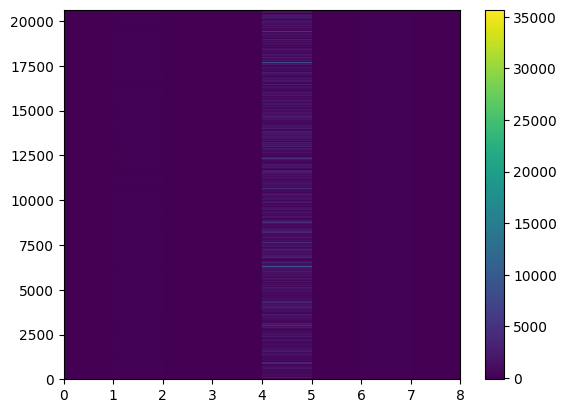

In [ ]:
X=housing.data
y=housing.target
print(X.shape, y.shape)
plt.pcolormesh(X)
plt.colorbar()
plt.show()

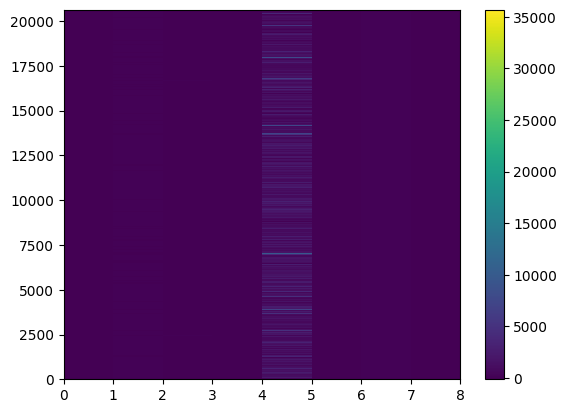

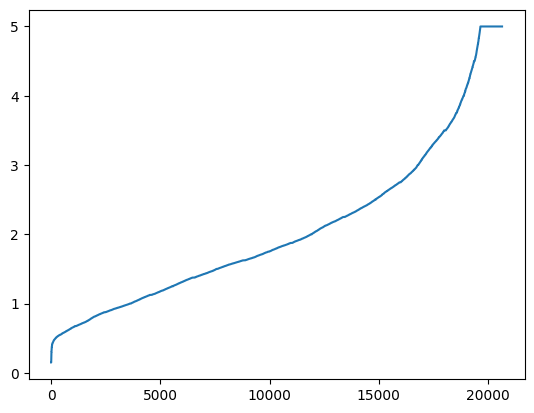

In [ ]:
ind_ =np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()
plt.plot(np.sort(y))
plt.show()

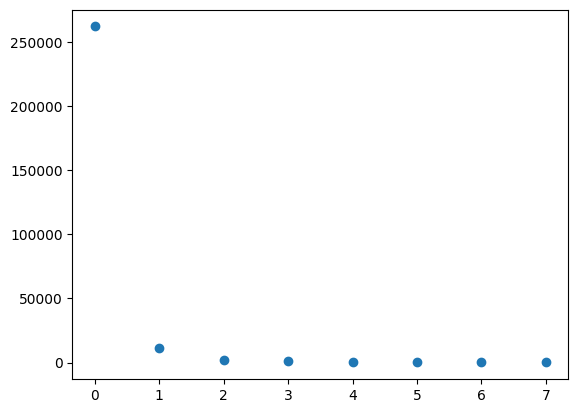

In [ ]:
U,S,Vh = np.linalg.svd(X)
plt.scatter(np.arange(len(S)),S)
plt.show()

In [ ]:
def mincua_reg(X,y, lamb_=1e-3): #Ajustar, optimizar
  alpha=np.linalg.inv(X.T.dot(X)+lamb_*np.eye(X.shape[1])).dot(X.T).dot(y)
  return alpha

[ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02]


<StemContainer object of 3 artists>

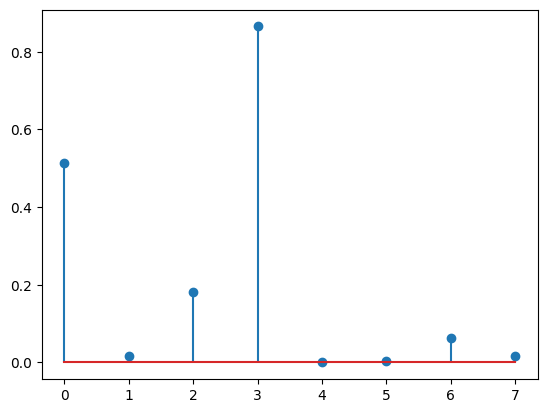

In [ ]:
alpha =mincua_reg(X,y)
print(alpha)
plt.stem(np.arange(len(alpha)),np.abs(alpha))

In [ ]:
ypred = X.dot(alpha)

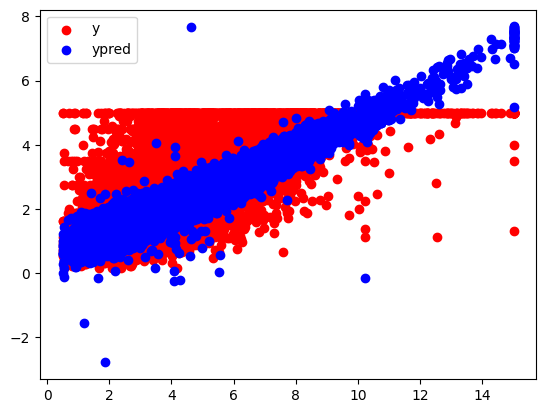

In [ ]:
plt.scatter(X[ind_,0],y[ind_], color='red', label='y')
plt.scatter(X[ind_,0],ypred[ind_], color='blue', label='ypred')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Escalamos X para mejorar convergencia del gradiente
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Añadimos bias (intercepto)
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
y = y.reshape(-1, 1)   # -> (20640, 1)


In [ ]:
def compute_cost(X, y, theta):
    N = len(y)
    errors = X.dot(theta) - y
    return (1/(2*N)) * np.sum(errors**2)

def compute_gradient(X, y, theta):
    N = len(y)
    errors = X.dot(theta) - y
    return (1/N) * X.T.dot(errors)


In [ ]:
# Inicialización
theta = np.zeros((X_b.shape[1], 1))  # parámetros iniciales
learning_rate = 0.1
epochs = 500

cost_history = []

for i in range(epochs):
    grad = compute_gradient(X_b, y, theta)
    theta = theta - learning_rate * grad

    cost = compute_cost(X_b, y, theta)
    cost_history.append(cost)

    if i % 50 == 0:
        print(f"Iteración {i}: Costo = {cost:.4f}")


Iteración 0: Costo = 2.3315
Iteración 50: Costo = 0.2925
Iteración 100: Costo = 0.2762
Iteración 150: Costo = 0.2688
Iteración 200: Costo = 0.2654
Iteración 250: Costo = 0.2638
Iteración 300: Costo = 0.2630
Iteración 350: Costo = 0.2626
Iteración 400: Costo = 0.2624
Iteración 450: Costo = 0.2623



Parámetros finales aprendidos (theta):
[ 2.06855817  0.83881422  0.12274148 -0.27866126  0.31469346] ...


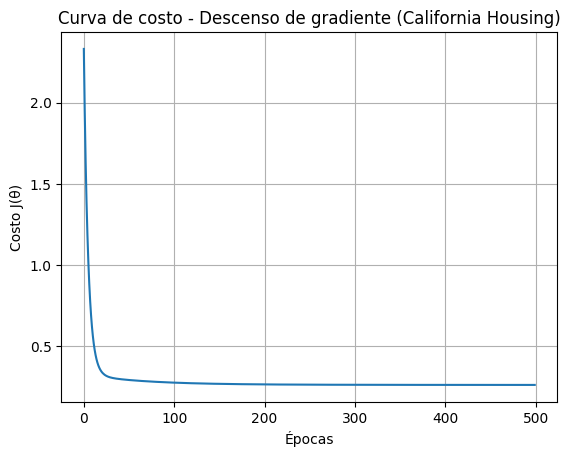

In [ ]:
print("\nParámetros finales aprendidos (theta):")
print(theta.flatten()[:5], "...")  # mostramos los primeros 5

import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.title("Curva de costo - Descenso de gradiente (California Housing)")
plt.xlabel("Épocas")
plt.ylabel("Costo J(θ)")
plt.grid(True)
plt.show()


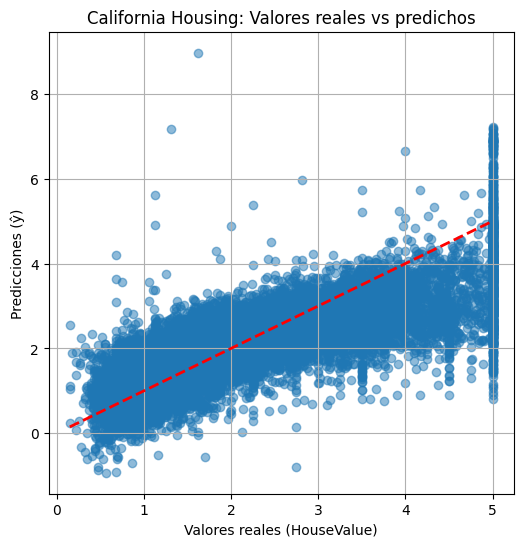

In [ ]:
from sklearn.datasets import fetch_california_housing

# Dataset real
housing = fetch_california_housing()
X, y = housing.data, housing.target.reshape(-1, 1)

# Normalizar X y añadir bias
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Gradiente descendente
theta = np.zeros((X_b.shape[1], 1))
lr, epochs = 0.1, 500
for i in range(epochs):
    grad = compute_gradient(X_b, y, theta)
    theta -= lr * grad

# Predicciones
y_pred = X_b.dot(theta)

# Scatter: y real vs predicción
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)  # línea ideal
plt.title("California Housing: Valores reales vs predichos")
plt.xlabel("Valores reales (HouseValue)")
plt.ylabel("Predicciones (ŷ)")
plt.grid(True)
plt.show()
